<h2>Creazione serie storica decessi COVID-19 confermati dal 24 febbraio 2020 al 30 settembre 2020

In [1]:
import pandas as pd
df = pd.read_csv('csv/decessi_covid19.csv')
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN,NaN,NaN,NaN


In [2]:
df.drop(['stato', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 
            'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi',
            'nuovi_positivi', 'dimessi_guariti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
            'totale_casi', 'note', 'tamponi', 'casi_testati', 'ingressi_terapia_intensiva', 'note_test', 'note_casi'], 
        axis=1, inplace=True)
df

,data,deceduti
0,2020-02-24T18:00:00,7
1,2020-02-25T18:00:00,10
2,2020-02-26T18:00:00,12
3,2020-02-27T18:00:00,17
4,2020-02-28T18:00:00,21
...,...,...
289,2020-12-09T17:00:00,61739
290,2020-12-10T17:00:00,62626
291,2020-12-11T17:00:00,63387
292,2020-12-12T17:00:00,64036


Modifica del formato del campo <b>data</b> e <b>deceduti</b>

In [3]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df['data'] = df['data'].dt.strftime('%Y-%m-%d')

df['deceduti'] = pd.to_numeric(df['deceduti'])
df.head()

,data,deceduti
0,2020-02-24,7
1,2020-02-25,10
2,2020-02-26,12
3,2020-02-27,17
4,2020-02-28,21


Per poter confrontare i valori dei decessi COVID-19 con quelli totali forniti dall'ISTAT è necessario che la porzione di tempo sia la stessa, per questo motivo, l'analisi sarà effettuata fino al 30 settembre 2020 compreso.

In [4]:
df = df[df['data'] < '2020-10-01']
df

,data,deceduti
0,2020-02-24,7
1,2020-02-25,10
2,2020-02-26,12
3,2020-02-27,17
4,2020-02-28,21
...,...,...
215,2020-09-26,35818
216,2020-09-27,35835
217,2020-09-28,35851
218,2020-09-29,35875


In [5]:
#numero di record
index = df.index
record = len(index)
print(record)

220


In [6]:
import numpy as np
deceduti = df['deceduti']
print('mean', np.mean(deceduti))
print('min', np.min(deceduti))
print('max', np.max(deceduti))

mean 27332.77727272727
min 7
max 35894


In [7]:
df=df.set_index('data')
df.head()

,deceduti
data,
2020-02-24,7
2020-02-25,10
2020-02-26,12
2020-02-27,17
2020-02-28,21


Il campo <b>decessi</b> è riportato per incremento, per il numero effettivo di decessi avvenuti in un giorno è necessario applicarvi l'operazione di differenza.

In [8]:
import numpy as np

df_diff = df.diff()
df_diff.head()

,deceduti
data,
2020-02-24,NaN
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [9]:
#aggiungo manualmente il primo valore della serie che dopo l'operazione di differenza risulta essere 'NaN'
df_diff.fillna(7, inplace=True)
df_diff.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [10]:
df_diff.to_csv('csv/serieStorica_decessi_covid19.csv')

In [11]:
df_diff = df_diff.reset_index()
df_diff.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [12]:
df_diff['data'] = pd.to_datetime(df_diff['data'], dayfirst=True)

In [13]:
df_ita =df_diff.set_index('data')
df_ita

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0
...,...
2020-09-26,17.0
2020-09-27,17.0
2020-09-28,16.0


In [14]:
df_ita = df_ita.groupby(pd.Grouper(freq='M')).sum()
df_ita

,deceduti
data,
2020-02-29,29.0
2020-03-31,12399.0
2020-04-30,15539.0
2020-05-31,5448.0
2020-06-30,1352.0
2020-07-31,374.0
2020-08-31,342.0
2020-09-30,411.0


In [15]:
ts = df_ita.deceduti
ts.head()

data
2020-02-29       29.0
2020-03-31    12399.0
2020-04-30    15539.0
2020-05-31     5448.0
2020-06-30     1352.0
Freq: M, Name: deceduti, dtype: float64

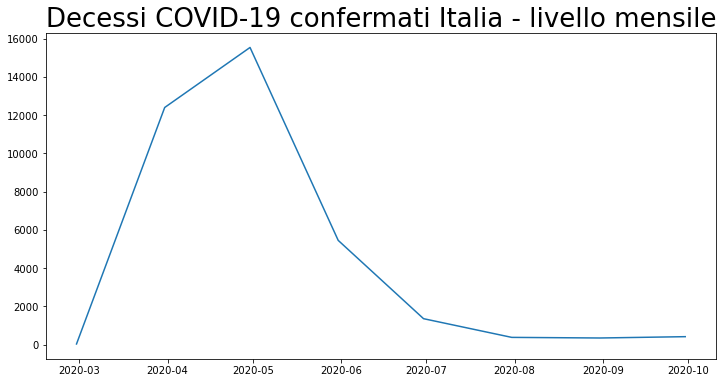

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati Italia - livello mensile', size=26)
plt.plot(ts)
plt.show()